In [ ]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.5.0)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
#!pip install keras==2.2.4
from tensorflow import keras
print(keras.__version__)

2.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/RCNN/

/content/drive/MyDrive/RCNN


In [ ]:
!git clone https://github.com/akTwelve/Mask_RCNN.git
#! git clone https://github.com/matterport/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [ ]:
%cd Mask_RCNN

/content/drive/My Drive/RCNN/Mask_RCNN


In [ ]:
!pip install -r requirements.txt
!python setup.py clean --all install

     |████████████████████████████████| 163kB 4.1MB/s 
     |████████████████████████████████| 204kB 28.7MB/s 
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:694: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:694: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:694: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running clean
removing 'build/lib' (and everything under it)
removing 'build/bdist.linux-x86_64' (and everything under it)
'build/scripts-3.7' does not exist

In [ ]:
!pip show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg
Requires: 
Required-by: 


In [ ]:
from os import listdir
from numpy import zeros
from numpy import asarray
from Mask_RCNN.mrcnn.utils import Dataset
import cv2
from matplotlib import pyplot

class SolarDataset(Dataset):

  def load_dataset(self, dataset_dir, is_train=True):
    self.add_class("dataset", 1, "hotspot")
    images_dir = dataset_dir + '/images/'
    annotations_dir = dataset_dir + '/annots/'
    c = 0
    for filename in listdir(images_dir):
      c = c+1
      image_id = filename[:-4]
      if is_train and c >= 664:
        continue
      if not is_train and c < 664:
        continue
      img_path = images_dir + filename
      ann_path = annotations_dir + image_id + '.txt'
      self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)

	# extract bounding boxes from an annotation file
  def extract_boxes(self,filename):
    file1 = open(filename,"r+")
    l = file1.readlines()
    boxes = []
    filename = "/"+filename.split("/")[1]+"/"+filename.split("/")[2]+"/"+filename.split("/")[3]+"/"+filename.split("/")[4]+"/"+filename.split("/")[5]+"/images/" + filename.split("/")[7]
    img = cv2.imread(filename[:-4]+".jpg")
    img_height, img_width = img.shape[:2]
    for i in range(len(l)):
      c = l[i].split("\n")[0].split(" ")
      x_c = float(c[1])
      y_c = float(c[2])
      w = float(c[3])
      h = float(c[4])
      xmax = (img_width*(2*x_c + w)/2)
      xmin = (img_width*(2*x_c - w)/2)
      ymax = (img_height*(2*y_c + h)/2)
      ymin = (img_height*(2*y_c - h)/2)
      boxes.append([int(xmin),int(ymin),int(xmax),int(ymax)])
    return boxes,img_width,img_height

  def load_mask(self, image_id):
    info = self.image_info[image_id]
    path = info['annotation']
    boxes, w, h = self.extract_boxes(path)
    masks = zeros([h, w, len(boxes)], dtype='uint8')
    class_ids = list()
    for i in range(len(boxes)):
      box = boxes[i]
      row_s, row_e = box[1], box[3]
      col_s, col_e = box[0], box[2]
      masks[row_s:row_e, col_s:col_e, i] = 1
      class_ids.append(self.class_names.index('hotspot'))
    return masks, asarray(class_ids, dtype='int32')

  def image_reference(self, image_id):
    info = self.image_info[image_id]
    return info['path']

# train set
train_set = SolarDataset()
train_set.load_dataset('/content/drive/MyDrive/RCNN/solar', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# test/val set
test_set = SolarDataset()
test_set.load_dataset('/content/drive/MyDrive/RCNN/solar', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Train: 663
Test: 174


(240, 320, 3)
(240, 320, 1)


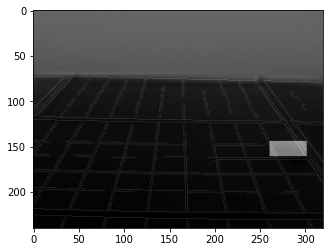

In [ ]:
image_id = 3
image = train_set.load_image(image_id)
print(image.shape)
mask, class_ids = train_set.load_mask(image_id)
print(mask.shape)
pyplot.imshow(image)
pyplot.imshow(mask[:, :, 0], cmap='gray', alpha=0.5)
pyplot.show()

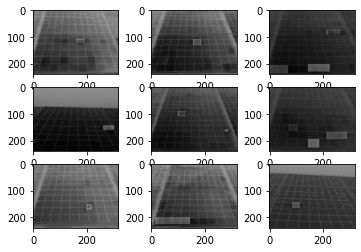

In [ ]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	image = train_set.load_image(i)
	pyplot.imshow(image)
	# plot all masks
	mask, _ = train_set.load_mask(i)
	for j in range(mask.shape[2]):
		pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
# show the figure
pyplot.show()

In [ ]:
# enumerate all images in the dataset
for image_id in train_set.image_ids:
	# load image info
	info = train_set.image_info[image_id]
	# display on the console
	print(info)

{'id': 'FLIR0008_thermal_Greys', 'source': 'dataset', 'path': '/content/drive/MyDrive/RCNN/solar/images/FLIR0008_thermal_Greys.jpg', 'annotation': '/content/drive/MyDrive/RCNN/solar/annots/FLIR0008_thermal_Greys.txt'}
{'id': 'FLIR0014_thermal_Greys', 'source': 'dataset', 'path': '/content/drive/MyDrive/RCNN/solar/images/FLIR0014_thermal_Greys.jpg', 'annotation': '/content/drive/MyDrive/RCNN/solar/annots/FLIR0014_thermal_Greys.txt'}
{'id': 'FLIR0017_thermal_Greys', 'source': 'dataset', 'path': '/content/drive/MyDrive/RCNN/solar/images/FLIR0017_thermal_Greys.jpg', 'annotation': '/content/drive/MyDrive/RCNN/solar/annots/FLIR0017_thermal_Greys.txt'}
{'id': 'FLIR0004_thermal_Greys', 'source': 'dataset', 'path': '/content/drive/MyDrive/RCNN/solar/images/FLIR0004_thermal_Greys.jpg', 'annotation': '/content/drive/MyDrive/RCNN/solar/annots/FLIR0004_thermal_Greys.txt'}
{'id': 'FLIR0013_thermal_Greys', 'source': 'dataset', 'path': '/content/drive/MyDrive/RCNN/solar/images/FLIR0013_thermal_Greys.j

In [ ]:
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
class SolarConfig(Config):
	NAME = "solar_cfg"
	NUM_CLASSES = 1 + 1
	STEPS_PER_EPOCH = 131

In [ ]:

train_set = SolarDataset()
train_set.load_dataset('/content/drive/MyDrive/RCNN/solar', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

test_set = SolarDataset()
test_set.load_dataset('/content/drive/MyDrive/RCNN/solar', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

config = SolarConfig()
config.display()

model = MaskRCNN(mode='training', model_dir='./', config=config)

model.load_weights('/content/drive/MyDrive/RCNN/mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=50, layers='heads')

Train: 663
Test: 174

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50


In [ ]:
%cd /content/drive/MyDrive/RCNN/

from Mask_RCNN.mrcnn.config import Config
from Mask_RCNN.mrcnn.model import MaskRCNN
from Mask_RCNN.mrcnn.utils import Dataset
from Mask_RCNN.mrcnn.utils import compute_ap
from Mask_RCNN.mrcnn.model import load_image_gt
from Mask_RCNN.mrcnn.model import mold_image
from numpy import expand_dims
from numpy import mean
class PredictionConfig(Config):
	NAME = "solar_cfg"
	NUM_CLASSES = 1 + 1
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1
cfg = PredictionConfig()

In [ ]:
def evaluate_model(dataset, model, cfg):
	APs = list()
	for image_id in dataset.image_ids:
		image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
		scaled_image = mold_image(image, cfg)
		sample = expand_dims(scaled_image, 0)
		yhat = model.detect(sample, verbose=0)
		r = yhat[0]
		AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
		APs.append(AP)
	mAP = mean(APs)
	return mAP

In [ ]:
# plot a number of photos with ground truth and predictions
def plot_actual_vs_predicted(dataset, model, cfg, n_images=1):
  for i in range(n_images):
    image = dataset.load_image(i)
    print("image: ",image)
    mask, _ = dataset.load_mask(i)
    scaled_image = mold_image(image, cfg)
    print("scaled_image: ",scaled_image)
    sample = expand_dims(scaled_image, 0)
    print(sample.shape)
    yhat = model.detect(sample, verbose=0)[0]
    print(yhat)
    pyplot.subplot(n_images, 2, i*2+1)
    pyplot.imshow(image)
    pyplot.title('Actual')
    for j in range(mask.shape[2]):
      pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
      # get the context for drawing boxes
      pyplot.subplot(n_images, 2, i*2+2)
      # plot raw pixel data
      pyplot.imshow(image)
      pyplot.title('Predicted')
      ax = pyplot.gca()
      # plot each box
      for box in yhat['rois']:
        # get coordinates
        y1, x1, y2, x2 = box
        # calculate width and height of the box
        width, height = x2 - x1, y2 - y1
        # create the shape
        rect = Rectangle((x1, y1), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the figure
    pyplot.show()

In [ ]:
from matplotlib.patches import Rectangle
train_set = SolarDataset()
train_set.load_dataset('/content/drive/MyDrive/RCNN/solar', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
test_set = SolarDataset()
test_set.load_dataset('/content/drive/MyDrive/RCNN/solar', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))
cfg = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
model_path = '/content/drive/MyDrive/RCNN/Mask_RCNN/solar_cfg20210413T1617/mask_rcnn_solar_cfg_0050.h5'
model.load_weights(model_path, by_name=True)
plot_actual_vs_predicted(train_set, model, cfg)
plot_actual_vs_predicted(test_set, model, cfg)


NameError: ignored

In [ ]:
#import tensorflow as tf
#from tensorflow import keras
import numpy as np
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.utils import Dataset
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
from numpy import mean
from os import listdir
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
import cv2
from matplotlib import pyplot
from matplotlib.patches import Rectangle

In [ ]:
class PredictionConfig(Config):
	# define the name of the configuration
	NAME = "solar_cfg"
	# number of classes (background + kangaroo)
	NUM_CLASSES = 1 + 1
	# simplify GPU config
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1
# create config
cfg = PredictionConfig()

Re-starting from epoch 50
scaled_image:  [[[[ 77.3  84.2  97.1]
   [ 77.3  84.2  97.1]
   [ 77.3  84.2  97.1]
   ...
   [ 77.3  84.2  97.1]
   [ 77.3  84.2  97.1]
   [ 76.3  83.2  96.1]]

  [[ 77.3  84.2  97.1]
   [ 77.3  84.2  97.1]
   [ 77.3  84.2  97.1]
   ...
   [ 78.3  85.2  98.1]
   [ 77.3  84.2  97.1]
   [ 77.3  84.2  97.1]]

  [[ 77.3  84.2  97.1]
   [ 77.3  84.2  97.1]
   [ 77.3  84.2  97.1]
   ...
   [ 78.3  85.2  98.1]
   [ 77.3  84.2  97.1]
   [ 77.3  84.2  97.1]]

  ...

  [[-66.7 -59.8 -46.9]
   [-62.7 -55.8 -42.9]
   [-63.7 -56.8 -43.9]
   ...
   [-71.7 -64.8 -51.9]
   [-71.7 -64.8 -51.9]
   [-71.7 -64.8 -51.9]]

  [[-63.7 -56.8 -43.9]
   [-69.7 -62.8 -49.9]
   [-66.7 -59.8 -46.9]
   ...
   [-71.7 -64.8 -51.9]
   [-71.7 -64.8 -51.9]
   [-71.7 -64.8 -51.9]]

  [[-65.7 -58.8 -45.9]
   [-65.7 -58.8 -45.9]
   [-64.7 -57.8 -44.9]
   ...
   [-71.7 -64.8 -51.9]
   [-71.7 -64.8 -51.9]
   [-71.7 -64.8 -51.9]]]]
(1, 240, 320, 3)


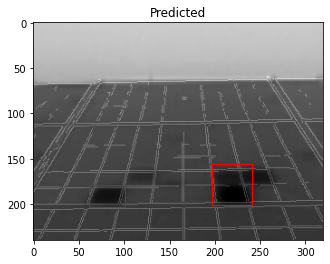

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
# load model weights
model_path = '/content/drive/MyDrive/RCNN/Mask_RCNN/solar_cfg20210413T1617/mask_rcnn_solar_cfg_0050.h5'
model.load_weights(model_path, by_name=True)
i = "/content/drive/MyDrive/RCNN/solar/images/FLIR0126_thermal_Greys.jpg"
image = tf.keras.preprocessing.image.load_img(i)
input_arr = keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
scaled_image = mold_image(input_arr, cfg)
print("scaled_image: ",scaled_image)
#sample = expand_dims(scaled_image, 0)
print(scaled_image.shape)
yhat = model.detect(scaled_image, verbose=0)[0]
pyplot.imshow(image)
pyplot.title('Predicted')
ax = pyplot.gca()
c = 0
for box in yhat['rois']:
  y1, x1, y2, x2 = box
  width, height = x2 - x1, y2 - y1
  rect = Rectangle((x1, y1), width, height, fill=False, color='red')
  ax.add_patch(rect)
  c+=1
  if c >=2:
    break
pyplot.show()

In [ ]:
print(yhat['rois'])

[[198 185 227 223]
 [197 219 224 255]
 [217 191 240 227]
 [195  78 230 119]
 [199  45 229  80]
 [ 82  32 109 146]
 [178  44 205  82]
 [135  23 162  57]
 [ 10 160  21 180]
 [198 280 227 320]
 [178  13 205  51]
 [201   7 231  48]
 [155  83 183 117]
 [193 146 238 192]
 [176  81 206 116]
 [175 214 200 248]
 [ 45 134  67 177]
 [198 111 229 153]
 [102  77 125 113]
 [175 179 202 216]
 [154 114 183 149]
 [155  19 183  54]
 [174 148 204 184]
 [135 142 164 175]
 [106 210 131 244]
 [219  37 240  83]
 [129 114 162 144]
 [170 294 200 319]
 [ 79 104 108 137]
 [175 115 203 151]
 [215 290 240 320]
 [131  84 161 115]
 [ 80  36 108  67]
 [  5  62  18  99]
 [219  71 240 121]
 [117  28 144  61]
 [120  78 145 115]
 [ 18 237  52 320]
 [107 164 136 200]
 [219 219 240 268]
 [220 105 240 157]
 [106 184 127 220]
 [ 80  57 106  92]
 [100 132 125 168]
 [143 279 175 320]
 [154  53 181  84]
 [221   0 240  49]
 [154 176 186 211]
 [ 45 265  71 306]
 [137  53 163  89]
 [101  32 128  64]
 [  9 176  23 215]
 [105 113 14

In [ ]:
%cd /content/drive/MyDrive/RCNN

/content/drive/MyDrive/RCNN


In [ ]:
from Mask_RCNN.mrcnn.config import Config
from Mask_RCNN.mrcnn.model import MaskRCNN
from Mask_RCNN.mrcnn.utils import Dataset
from Mask_RCNN.mrcnn.utils import compute_ap
from Mask_RCNN.mrcnn.model import load_image_gt
from Mask_RCNN.mrcnn.model import mold_image
from numpy import mean
import os
from numpy import zeros
from numpy import asarray
import cv2
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot

In [ ]:
class SolarConfig(Config):
	NAME = "solar_cfg"
	NUM_CLASSES = 1 + 1
	STEPS_PER_EPOCH = 131

class PredictionConfig(Config):
	NAME = "solar_cfg"
	NUM_CLASSES = 1 + 1
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1

def get_roi(i):
  cfg = PredictionConfig()
  model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
  model_path = '/content/drive/MyDrive/Mask_RCNN/solar_cfg20210413T1617/mask_rcnn_solar_cfg_0050.h5'
  model.load_weights(model_path, by_name=True)
  image = tf.keras.preprocessing.image.load_img(i)
  input_arr = keras.preprocessing.image.img_to_array(image)
  input_arr = np.array([input_arr])
  scaled_image = mold_image(input_arr, cfg)
  yhat = model.detect(scaled_image, verbose=0)[0]
  print(yhat)
  box = yhat['rois']
  pyplot.imshow(image)
  pyplot.title('Predicted')
  ax = pyplot.gca()
  # plot each box
  for box in range(len(yhat['rois'])):
    if yhat["scores"][box] >0.95:
      # get coordinates
      y1, x1, y2, x2 = yhat['rois'][box]
      # calculate width and height of the box
      width, height = x2 - x1, y2 - y1
      # create the shape
      rect = pyplot.Rectangle((x1, y1), width, height, fill=False, color='red')
      # draw the box
      ax.add_patch(rect)
    else:
      break
  # show the figure
  pyplot.show()

Re-starting from epoch 50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


{'rois': array([[179,  61, 203, 101],
       [156, 197, 201, 241],
       [161, 104, 182, 134],
       [159, 228, 182, 267],
       [160, 254, 197, 318],
       [159, 166, 196, 201],
       [200, 166, 237, 207],
       [201,   3, 235, 101],
       [162,  73, 184, 102],
       [205,  13, 230,  53],
       [133,  78, 162, 103],
       [198, 266, 238, 320],
       [160, 135, 183, 164],
       [180,  28, 204,  60],
       [199,  89, 231, 169],
       [197, 205, 227, 244],
       [226,   5, 240,  51],
       [ 69, 144, 105, 187],
       [181,   0, 203,  32],
       [222, 278, 240, 320],
       [163,  39, 186,  69],
       [138, 291, 163, 319],
       [138, 167, 164, 196],
       [173, 291, 196, 318],
       [177, 132, 201, 165],
       [223,  43, 240,  87],
       [163,  97, 182, 192],
       [174, 105, 200, 132],
       [135, 223, 162, 253]], dtype=int32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32), 'score

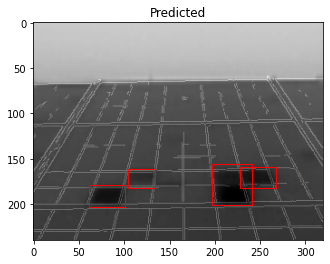

In [ ]:
i = "/content/drive/MyDrive/RCNN/solar/images/FLIR0126_thermal_Greys.jpg"
get_roi(i)